In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import tensorflow as tf
import tensorflow_decision_forests as tfdf

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1)
plt.style.use('ggplot')


train_df = pd.read_csv('/kaggle/input/rhmcd-20-depression/mental_health_finaldata_1.csv')

print(f'train_df.shape = {train_df.shape}')


train_df.shape = (799, 13)


In [2]:
train_df

,Age,Sex,Occupation,Days Indoors,Growing Stress,Quarantine Frustrations,Changes Habits,Mental Health History,Weight Change,Mood Swings,Coping Struggles,Work Interest,Social Weakness
0,20-25,Female,Corporate,1-14 days,Yes,Yes,No,Yes,Yes,Medium,No,No,Yes
1,30-Above,Male,Others,31-60 days,Yes,Yes,Maybe,No,No,High,No,No,Yes
2,30-Above,Female,Student,Go out Every day,No,No,Yes,No,No,Medium,Yes,Maybe,No
3,25-30,Male,Others,1-14 days,Yes,No,Maybe,No,Maybe,Medium,No,Maybe,Yes
4,16-20,Female,Student,More than 2 months,Yes,Yes,Yes,No,Yes,Medium,Yes,Maybe,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
794,30-Above,Female,Housewife,Go out Every day,Yes,Maybe,No,No,No,Low,No,No,Yes
795,25-30,Male,Student,Go out Every day,Maybe,Yes,Maybe,No,Maybe,High,Yes,Maybe,No
796,20-25,Male,Others,Go out Every day,Yes,No,Yes,No,Maybe,Medium,Yes,No,Maybe
797,30-Above,Female,Housewife,1-14 days,Yes,Yes,No,Yes,Maybe,High,No,Yes,Yes


In [3]:
train_df.describe()

,Age,Sex,Occupation,Days Indoors,Growing Stress,Quarantine Frustrations,Changes Habits,Mental Health History,Weight Change,Mood Swings,Coping Struggles,Work Interest,Social Weakness
count,799,799,799,799,799,799,799,799,799,799,799,799,799
unique,4,2,5,5,3,3,3,3,3,3,2,3,3
top,30-Above,Female,Housewife,31-60 days,Yes,Yes,Yes,Maybe,Maybe,Low,No,No,Maybe
freq,217,425,182,168,292,298,302,276,271,271,401,285,273


<BarContainer object of 2 artists>

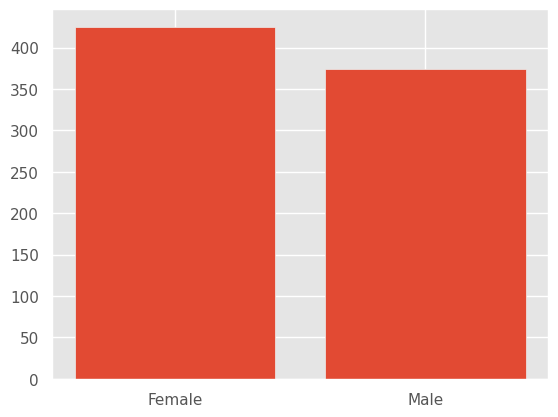

In [4]:
plt.bar(train_df["Sex"].unique(), train_df["Sex"].value_counts())


<BarContainer object of 4 artists>

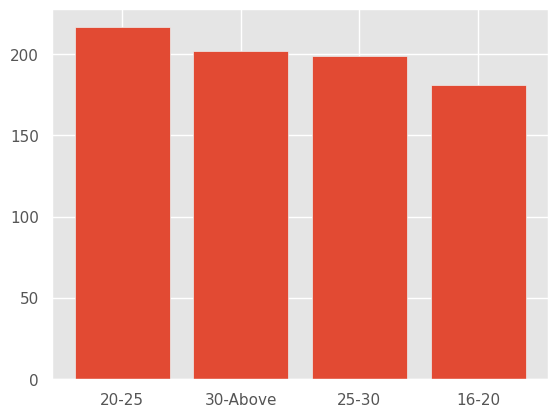

In [5]:
plt.bar(train_df["Age"].unique(), train_df["Age"].value_counts())


<BarContainer object of 5 artists>

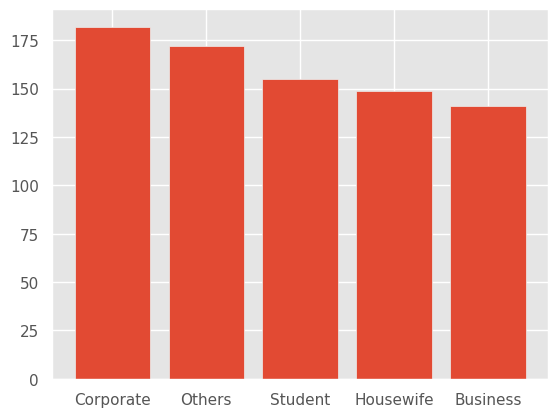

In [6]:
plt.bar(train_df["Occupation"].unique(), train_df["Occupation"].value_counts())


<BarContainer object of 5 artists>

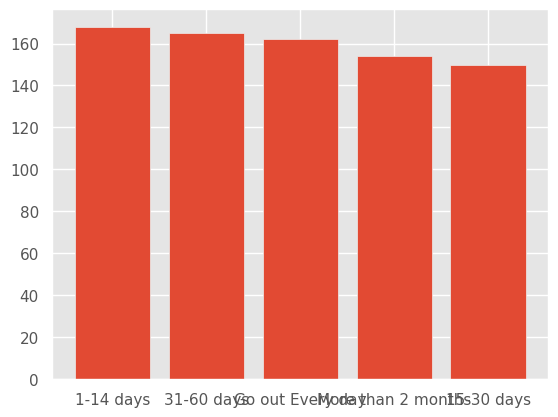

In [7]:
plt.bar(train_df["Days Indoors"].unique(), train_df["Days Indoors"].value_counts())

<BarContainer object of 3 artists>

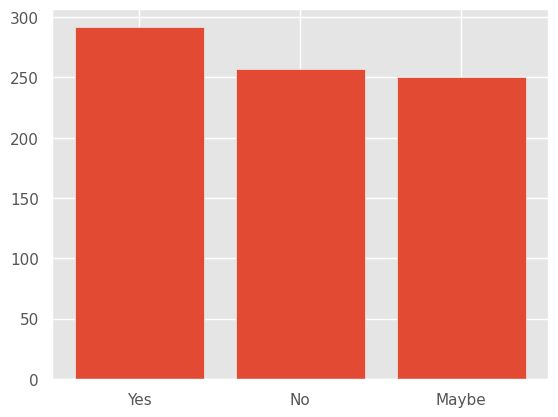

In [8]:
plt.bar(train_df["Growing Stress"].unique(), train_df["Growing Stress"].value_counts())

<BarContainer object of 3 artists>

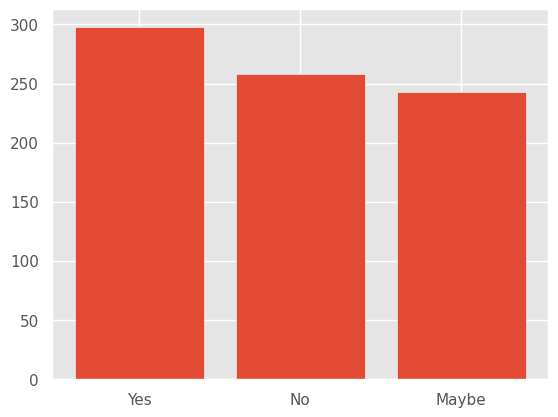

In [9]:
plt.bar(train_df["Quarantine Frustrations"].unique(), train_df["Quarantine Frustrations"].value_counts())

<BarContainer object of 3 artists>

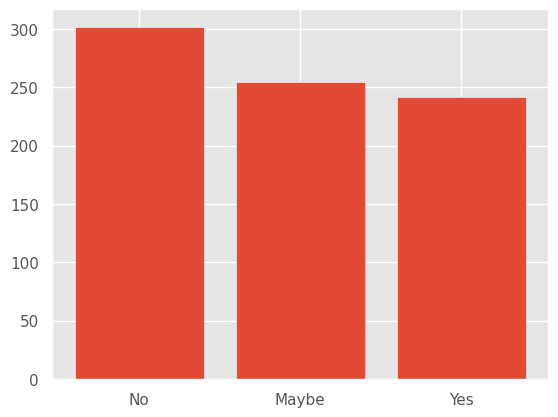

In [10]:
plt.bar(train_df["Changes Habits"].unique(), train_df["Changes Habits"].value_counts())

<BarContainer object of 3 artists>

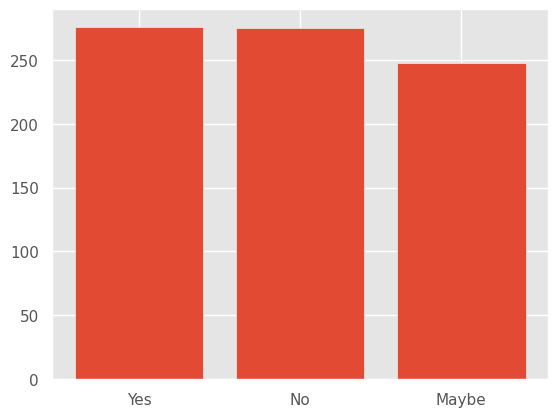

In [11]:
plt.bar(train_df["Mental Health History"].unique(), train_df["Mental Health History"].value_counts())

# Prepare The Data!

In [12]:
new = train_df
conv = {"Yes" : 1, "Maybe" : 0.5, "No" : 0}
conv2 = {"Low" : 0, "Medium" : 0.5, "High" : 1}
new["Growing Stress"] = new["Growing Stress"].map(conv)
new["Quarantine Frustrations"] = new["Quarantine Frustrations"].map(conv)
new["Changes Habits"] = new["Changes Habits"].map(conv)
new["Mental Health History"] = new["Mental Health History"].map(conv)
new["Weight Change"] = new["Weight Change"].map(conv)
new["Mood Swings"] = new["Mood Swings"].map(conv2)
new["Coping Struggles"] = new["Coping Struggles"].map(conv)
new["Work Interest"] = new["Work Interest"].map(conv)
new["Social Weakness"] = new["Social Weakness"].map(conv)
new

,Age,Sex,Occupation,Days Indoors,Growing Stress,Quarantine Frustrations,Changes Habits,Mental Health History,Weight Change,Mood Swings,Coping Struggles,Work Interest,Social Weakness
0,20-25,Female,Corporate,1-14 days,1.0,1.0,0.0,1.0,1.0,0.5,0.0,0.0,1.0
1,30-Above,Male,Others,31-60 days,1.0,1.0,0.5,0.0,0.0,1.0,0.0,0.0,1.0
2,30-Above,Female,Student,Go out Every day,0.0,0.0,1.0,0.0,0.0,0.5,1.0,0.5,0.0
3,25-30,Male,Others,1-14 days,1.0,0.0,0.5,0.0,0.5,0.5,0.0,0.5,1.0
4,16-20,Female,Student,More than 2 months,1.0,1.0,1.0,0.0,1.0,0.5,1.0,0.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
794,30-Above,Female,Housewife,Go out Every day,1.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,1.0
795,25-30,Male,Student,Go out Every day,0.5,1.0,0.5,0.0,0.5,1.0,1.0,0.5,0.0
796,20-25,Male,Others,Go out Every day,1.0,0.0,1.0,0.0,0.5,0.5,1.0,0.0,0.5
797,30-Above,Female,Housewife,1-14 days,1.0,1.0,0.0,1.0,0.5,1.0,0.0,1.0,1.0
